In [1]:
from datetime import datetime as dt
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import time
import numpy as np
from os import listdir
from os.path import isfile, join
import sys
import statsmodels.api as sm
import matplotlib.cm as cm
import scipy.stats
import itertools
import random
from scipy.stats.stats import pearsonr
import math
from scipy import stats
from itertools import groupby
%matplotlib inline


In [2]:
def flushPrint(variable):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % variable)
    sys.stdout.flush()

In [4]:
import lzma
import os

In [5]:

os.system( '/Users/lingfeiw/Documents/bigdata/SE/stackoverflow.com-Posts.7z -/Users/lingfeiw/Documents/bigdata/SE/SOPosts' )

32256

# Is the system effective ? Yes

In [5]:
path='/Users/lingfeiw/Documents/bigdata/stackexchange/unzip/'
sites = [ f for f in listdir(path) if f[-1]=='m']
site='stackoverflow.com'

Q={}
nq=0#number of questions 
nqa=0#number of questions with answer
A={}
n=0
filename = path + site + '/Posts.xml'
with open(filename,'r') as f:
    for line in f:
        n+=1
        if n%100000 == 0:
            flushPrint(n/100000)
        try:
            label = line.split('PostTypeId=')[1][1:2]
            postid = int(line.split('Id=')[1].split(r'"')[1])
            author = int(line.split('OwnerUserId=')[1].split(r'"')[1])
            datetime = line.split('CreationDate=')[1][1:20]
            if label == '1':#question
                nq+=1
                tags=line.split('Tags=')[1].split(r'"')[1].split(r';')
                tags=set([j for j in [i.split(r'&')[0] for i in tags if i] if j])
                l = line.split('AcceptedAnswerId=')
                if len(l)==2:# Questions that have answers
                    nqa+=1
                    answerID = int(l[1].split(r'"')[1])
                    Q[postid]= (author,answerID,datetime,tags) 
            if label == '2':#answer
                questionID = int(line.split('ParentId=')[1].split(r'"')[1])
                A[postid]= (author,questionID,datetime)
        except:
            pass
# 180

180

In [8]:
len(Q),len(A),nq,nqa,nqa/float(nq)

(3784918, 11463988, 6397292, 3784918, 0.5916437767730471)

In [91]:
#team size distribution
M=defaultdict(lambda:defaultdict(lambda:0))
n=0
for j in A:
    n+=1
    if n%100000 == 0:
        flushPrint(n/100000)
    try:
        wr,qid,wt = A[j]
        if qid in Q:
            M[qid][wr]+=1
    except:
        pass


114

In [9]:
# waiting time distribution
Qtag={}
Qwt={}
n=0
for i in Q:
    n+=1
    if n%100000 == 0:
        flushPrint(n/100000)
    try:
        answerid=Q[i][1]
        qtime = Q[i][2]
        ntags=len(Q[i][3])
        if answerid in A:
            atime=A[answerid][2]
            delta=dt.strptime(atime,'%Y-%m-%dT%H:%M:%S')-dt.strptime(qtime,'%Y-%m-%dT%H:%M:%S')
            wt=delta.seconds/60.0
            if wt>0:
                Qtag[i]=ntags #number of tags
                Qwt[i]=wt     #waiting time
    except:
        pass

37

In [244]:
len(Qtag),len(Qwt),len(M)

(3766007, 3766007, 3780049)

In [257]:
np.median(Qwt.values()),np.median([len(M[i]) for i in M])

(24.75, 2.0)

In [266]:
# distirbution of team size
cn=Counter([len(M[i]) for i in M])
xm,ym=np.array(cn.items()).T
ym=ym/float(ym.sum())
ct=Counter([np.round(i,0) for i in Qwt.values()])
xt,yt=np.array(ct.items()).T
yt=yt/float(yt.sum())

In [306]:
cx=Counter( Qtag.values())
xx,yx=np.array(cx.items()).T
yx=yx/float(yx.sum())

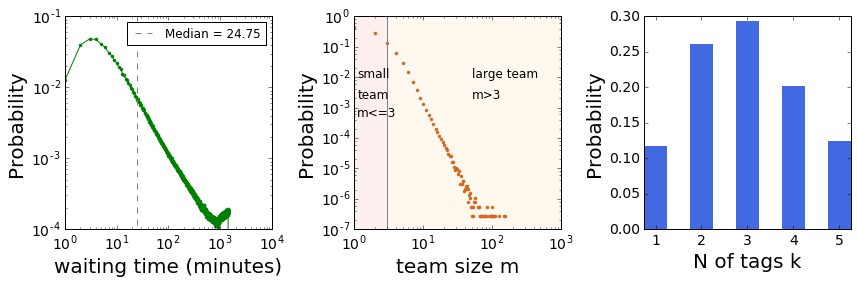

In [524]:
#cmap = cm.get_cmap('rainbow',5)
fig = plt.figure(figsize=(12, 4),facecolor='white')
#
ax = fig.add_subplot(131)
plt.plot(xt,yt,'g.-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('waiting time (minutes)',fontsize=20)
plt.ylabel('Probability',fontsize=20)
plt.plot([24.75,24.75],[0,1],marker='',linestyle='--',color='gray',label='Median = 24.75')
plt.legend(loc=1)
#plt.fill_between([-2**9,0],[0,0],[1,1],color='#FDEFEE')
#plt.fill_between([0,2**15],[0,0],[1,1],color='#FEF8EF')
plt.ylim(10**-4,0.1)
ax.tick_params(axis='both', which='major', labelsize=14)
#plt.yticks(rotation=45)
#
ax = fig.add_subplot(132)
plt.plot(xm,ym,marker='.',color='chocolate',linestyle='')
plt.xlabel('team size m',fontsize=20)
plt.ylabel('Probability',fontsize=20)
plt.fill_between([1,3],[0,0],[1,1],color='#FDEFEE')
plt.fill_between([3,1000],[0,0],[1,1],color='#FEF8EF')
plt.plot([3,3],[0,1],marker='',linestyle='-',color='gray')
plt.text(50,0.01,'large team',fontsize=12)
plt.text(50,0.002,'m>3',fontsize=12)
plt.text(1.1,0.01,'small',fontsize=12)
plt.text(1.1,0.002,'team',fontsize=12)
plt.text(1.1,0.0005,'m<=3',fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-7,1)
ax.tick_params(axis='both', which='major', labelsize=14)
#plt.yticks(rotation=45)
#
ax = fig.add_subplot(133)
width = .5
plt.bar(xx, yx, width=width,color='RoyalBlue',edgecolor='none')
plt.xticks(xx + width / 2, range(1,6))
plt.xlabel('N of tags k',fontsize=20)
plt.ylabel('Probability',fontsize=20)
#ax.tick_params(axis='both', which='major', labelsize=14)
#plt.yticks(rotation=45)
ax.tick_params(axis='both', which='major', labelsize=14)
#
plt.tight_layout()
plt.savefig('/Users/lingfeiw/Documents/research/effectiveTeam/dis.png')

# Are larger teams doing better than small teams ?

In [484]:
a=defaultdict(lambda:defaultdict(lambda:[]))
b=defaultdict(lambda:defaultdict(lambda:0))
for i in Qtag:
    if i in Qwt and i in M:
        ntags=Qtag[i]
        wt=Qwt[i]
        ts=len(M[i])
        a[ntags][ts].append(wt)
        b[ts][ntags]+=1
        #a[ntags][ts].append(wt)

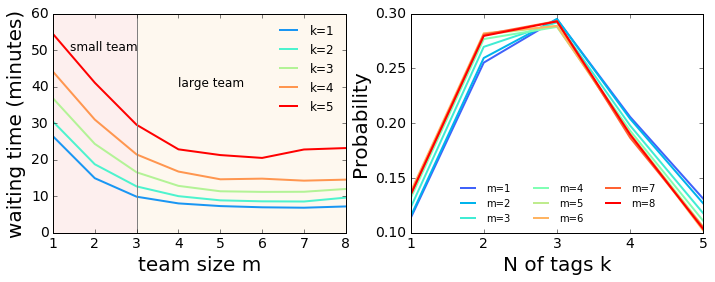

In [493]:
fig = plt.figure(figsize=(10, 4),facecolor='white')
cmap = cm.get_cmap('rainbow',6)
#
ax = fig.add_subplot(121)
for ntags in range(1,6):
    x,y=np.array(sorted([(i,np.median(a[ntags][i])) for i in a[ntags]])).T
    plt.plot(x,y,color=cmap(ntags),linewidth=2,label='k='+str(ntags))
plt.legend(frameon=False)
plt.xlim(1,8)
plt.ylim(0,60)
plt.fill_between([1,3],[0,0],[60,60],color='#FDEFEE')
plt.fill_between([3,8],[0,0],[60,60],color='#FEF8EF')
plt.plot([3,3],[0,60],marker='',linestyle='-',color='gray')
plt.xlabel('team size m',size=20)
plt.ylabel('waiting time (minutes)',size=20)
plt.text(4,40,'large team',fontsize=12)
plt.text(1.4,50,'small team',fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=14)
#plt.text(1.1,0.002,'team',fontsize=12)

#
ax = fig.add_subplot(122)
cmap = cm.get_cmap('rainbow',9)
for ts in range(1,9):
    x,y=np.array(b[ts].items()).T
    y=y/float(y.sum())
    plt.plot(x,y,color=cmap(ts),linewidth=2,label='m='+str(ts))
plt.legend(loc='best',ncol=3,fontsize=10,frameon=False)
plt.xlim(1,5)
#plt.ylim(0,60)
plt.xlabel('N of tags k',size=20)
plt.ylabel('Probability',size=20)
plt.xticks(range(1,6))
plt.tight_layout()
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('/Users/lingfeiw/Documents/research/effectiveTeam/diff.png')

In [12]:
#qr: questioner, qt: question time, wa: winning answer, wr: winner, wt: winning time; lr: loser, lt: losing time
QA={}
toremove=set([])
for q in Q: #questioners and winners
    qr,wa,qt,tags = Q[q]
    if wa in A:
        wr,qid,wt = A[wa]
        QA[-q]=[(qr,qt),(wr,wt),[]]
        toremove.add(wa)
for a in A: #losers
    if a not in toremove:
        lr,qid,lt = A[a]
        if -qid in QA:
            QA[-qid][2].append((lr,lt))
F=[] #[time, winner, loser]
for q in QA:
    a,b,c = QA[q]
    qr,qt = a
    wr,wt = b
    t = [[qt,q,qr],[wt,wr,q],[wt,wr,qr]]
    if c:
        t += [[lt,wr,lr] for lr,lt in c]
    F += t
F.sort()

# initialize
E = {}
mu = 25.0; sigma = 25.0/3; beta = sigma/2
S = set([i[1] for i in F]+[i[2] for i in F])
for i in S: E[i]=[mu,sigma]
    
# fast version of updating function
def fastupdate(mw,sw,ml,sl,beta): # miu and sigma of winner and loser
    sw2=math.pow(sw,2)
    sl2=math.pow(sl,2)
    t = mw - ml
    c = math.sqrt(34.72222+sw2+sl2)
    c2=math.pow(c,2)
    tc = t/c
    vtc = 0.79788*0.60653**math.pow(tc,2)/math.erfc(-0.70711*tc)
    wtc = vtc*(vtc + tc)
    mw += vtc*sw2/c
    ml -= vtc*sl2/c
    sw *= math.sqrt(1 - wtc*sw2/c2)
    sl *= math.sqrt(1 - wtc*sl2/c2)
    return mw,sw,ml,sl

# update
n=0
for i in F:
    n+=1
    if n%100000 == 0:
        flushPrint(n/100000)
    time, winner, loser = i
    mw,sw = E[winner]
    ml,sl = E[loser]
    nmw,nsw,nml,nsl = fastupdate(mw,sw,ml,sl,beta)
    E[winner]=[nmw,nsw]
    E[loser]=[nml,nsl]
    
US={}
QS={}
for i in E:
    mu,sigma = E[i]
    if i>0:
        US[i]=mu-3*sigma+10
    else:
        QS[-i]=mu-3*sigma+10

154

In [13]:
len(Q),len(A),len(QA),len(F),len(US),len(QS)

(3784918, 11463988, 3771002, 15425674, 912080, 3771002)

In [14]:
QS.items()[:3]

[(8388608, 18.10217523692659),
 (20502637, 16.097943225243807),
 (4, 16.065269663906165)]

In [17]:
min(QS.values()),max(QS.values())

(1.559784578042267, 32.00579837402808)

In [18]:
b=defaultdict(lambda:defaultdict(lambda:0))
for i in Qq:
    ntags,wt,nanswers=Qq[i]
    if i in QS:
        qscore=int(QS[i])
        b[ntags][qscore]+=1

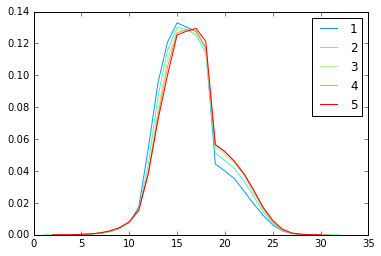

In [24]:
cmap = cm.get_cmap('rainbow',6)
for i in b:
    x,y=np.array(sorted(b[i].items())).T
    y=y/float(y.sum())
    plt.plot(x,y,color=cmap(i),label=str(i))
plt.legend()

In [17]:
QS[8388608]

18.10217523692659

In [22]:
b=defaultdict(lambda:defaultdict(lambda:[]))
for i in Qq:
    if i in QS:
        ntags,wt,nanswers=Qq[i]
        score=QS[i]
        if score<5:
            z='<5'
        if 5<=score<10:
            z='5-10'
        if 10<=score<15:
            z='10-15'
        if 15<=score<20:
            z='15-20'
        if 20<=score<25:
            z='20-25'
        if 25<=score:
            z='>25'
        b[z][nanswers].append(wt)

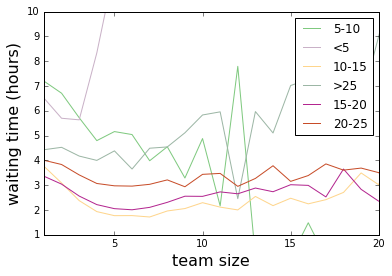

In [24]:
cmap = cm.get_cmap('Accent',7)
n=0
for z in b.keys():
    x,y=np.array(sorted([(i,np.mean(b[z][i])) for i in b[z]])).T
    plt.plot(x,y,color=cmap(n),label=str(z))
    n+=1
plt.legend()
plt.xlim(1,20)
plt.ylim(1,10)
plt.xlabel('team size',size=16)
plt.ylabel('waiting time (hours)',size=16)

# Is more concentrated or diverse skills better for answering questions ?

In [1]:
UT=defaultdict(lambda:{})
Tags=defaultdict(lambda:0)
n=0
for i in A:
    n+=1
    if n%100000 == 0:
        flushPrint(n/100000)
    Aauthor,questionID,datetime=A[i]
    if questionID in Q:
        Qauthor,answerID,datetime,tags=Q[questionID]
        for tag in tags:
            Tags[tag]+=1
        if answerID==i:# answer is accepted 
            for tag in tags:
                if tag in UT[Aauthor]:#tag: [m,n] m=total ansers, n=accepated answers
                    UT[Aauthor][tag][0]+=1
                    UT[Aauthor][tag][1]+=1
                else:
                    UT[Aauthor][tag]=[1,1]
        else:# answer is not accepted 
            for tag in tags:
                if tag in UT[Aauthor]:
                    UT[Aauthor][tag][0]+=1
                else:
                    UT[Aauthor][tag]=[1,0]

NameError: name 'defaultdict' is not defined

In [508]:
UU=defaultdict(lambda:0)
UU0=defaultdict(lambda:0)
n=0
for i in A:
    n+=1
    if n%100000 == 0:
        flushPrint(n/100000)
    Aauthor,questionID,datetime=A[i]
    UU0[Aauthor]+=1
    if questionID in Q:
        UU[Aauthor]+=1

114

In [510]:
len(A),len(Q),len(UU0),len(UU)

(11463988, 3784918, 790712, 602155)

In [511]:
602155/790712.0 

0.7615351733627415

In [505]:
len(UT)

602155

In [16]:
Tags=defaultdict(lambda:0)
n=0
for i in A:
    n+=1
    if n%100000 == 0:
        flushPrint(n/100000)
    Aauthor,questionID,datetime=A[i]
    if questionID in Q:
        Qauthor,answerID,datetime,tags=Q[questionID]
        for tag in tags:
            Tags[tag]+=1

114

In [499]:
mm=0
for questionID in Q:
    Qauthor,answerID,datetime,tags=Q[questionID]
    if set(tags).intersection(keytags):
        mm+=1

In [503]:
mm,nn,nn0

(2999438, 6522228, 7905772)

In [501]:
2999438/3784918.0

0.792471065423346

In [504]:
6522228.0/7905772

0.824995711993718

In [25]:
stags=sorted(Tags.items(),key=lambda x:-x[1])

In [119]:
keytags=zip(*stags[:50])[0]
keytags

('c#',
 'java',
 'javascript',
 'php',
 'jquery',
 'c++',
 'android',
 'python',
 'html',
 'mysql',
 '.net',
 'sql',
 'css',
 'asp.net',
 'iphone',
 'c',
 'ios',
 'objective-c',
 'ruby-on-rails',
 'regex',
 'arrays',
 'sql-server',
 'ruby',
 'string',
 'asp.net-mvc',
 'database',
 'xml',
 'ajax',
 'linux',
 'wpf',
 'json',
 'multithreading',
 'django',
 'windows',
 'algorithm',
 'vb.net',
 'performance',
 'xcode',
 'winforms',
 'linq',
 'eclipse',
 'perl',
 'bash',
 'r',
 'ruby-on-rails-3',
 'oop',
 'list',
 'html5',
 'git',
 'forms')

In [19]:
len(UT)

602155

In [123]:
keytags=['c#',
 'java',
 'javascript',
 'php',
 'jquery',
 'c++',
 'android',
 'python',
 'html',
 'mysql',
 '.net',
 'sql',
 'css',
 'asp.net',
 'iphone',
 'c',
 'ios',
 'objective-c',
 'ruby-on-rails',
 'regex',
 'arrays',
 'sql-server',
 'ruby',
 'string',
 'asp.net-mvc',
 'database',
 'xml',
 'ajax',
 'linux',
 'wpf',
 'json',
 'multithreading',
 'django',
 'windows',
 'algorithm',
 'vb.net',
 'performance',
 'xcode',
 'winforms',
 'linq',
 'eclipse',
 'perl',
 'bash',
 'r',
 'ruby-on-rails-3',
 'oop',
 'list',
 'html5',
 'git',
 'forms']

In [124]:
UP={}
for user in UT:
    dic=UT[user]
    vs=[]
    for tag in keytags:
        if tag in dic:
            x,y=dic[tag]
            vs.append(y/float(x))
        else:
            vs.append(0)
    UP[user]=vs
sample=[]
n=0
for i in UP:
    n+=1
    if n%100000 == 0:
        flushPrint(n/100000)
    if sum(UP[i])>5:
        sample.append(i)
            

6

In [122]:
len(sample)

37828

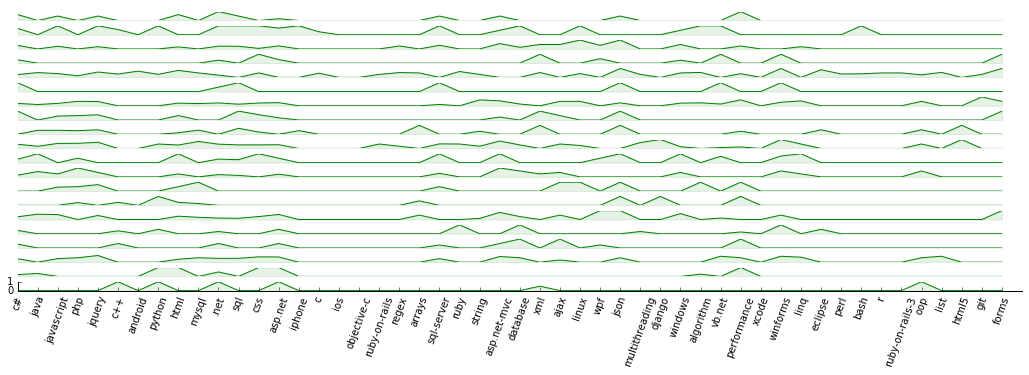

In [172]:
fig = plt.figure(figsize=(18, 5),facecolor='white')
for i in range(1,21):
    ax = fig.add_subplot(20,1,i)
    y=UP[sample[i]]
    ax.plot(y,color='g')
    ax.fill_between(range(len(keytags)),y,0,color='g',alpha=0.1)
    plt.yticks([0,1])
    if i <20:
        ax.axis('off')
        plt.gca().axes.get_xaxis().set_visible(False)
    else:
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_xticks(np.arange(len(keytags)))
        ax.set_xticklabels(keytags,fontsize=10,rotation=70)
#plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.6)
plt.savefig('/Users/lingfeiw/Documents/research/effectiveTeam/wave.png')

In [146]:
Qaer=defaultdict(lambda:[])
n=0
for i in A:
    n+=1
    if n%100000 == 0:
        flushPrint(n/100000)
    Aauthor,questionID,datetime=A[i]
    if questionID in Q:
        Qauthor,answerID,datetime,tags=Q[questionID]
        if set(tags).intersection(keytags):
            Qaer[questionID].append(Aauthor)

114

In [423]:
c=defaultdict(lambda:defaultdict(lambda:[]))
e=defaultdict(lambda:[])
n=0
for questionID in Qaer:
    n+=1
    if n%100000 == 0:
        flushPrint(n/100000)
    if questionID in Qwt and questionID in Qtag:
        wt=Qwt[questionID]
        ntags=Qtag[questionID]
        ts=len(M[questionID])
        '''
        score=QS[questionID]
        if score<5:
            z='<5'
        if 5<=score<10:
            z='5-10'
        if 10<=score<15:
            z='10-15'
        if 15<=score<20:
            z='15-20'
        if 20<=score<25:
            z='20-25'
        if 25<=score:
            z='>25'
        '''
        vs=Qaer[questionID]
        AVS=[]
        for i,j in itertools.combinations(vs, 2):
            if i in UP and j in UP:
                a=np.array(UP[i])
                b=np.array(UP[j])
                AVS.append(np.linalg.norm(a-b))
        if AVS:
            dis=int(np.round(np.mean(AVS),1))
            c[ntags][dis].append(wt)
            e[ts].append(np.mean(AVS))

29

In [435]:
e[2][:3]

[2.5632442264515669, 2.4388005016408179, 2.1895592715916119]

In [436]:
e[3][:3]

[2.663195401632565, 1.7100426860587905, 2.1820726572596074]

In [443]:
d=defaultdict(lambda:defaultdict(lambda:0))
for ts in e:
    for di in e[ts]:
        d[ts][np.round(di,1)]+=1

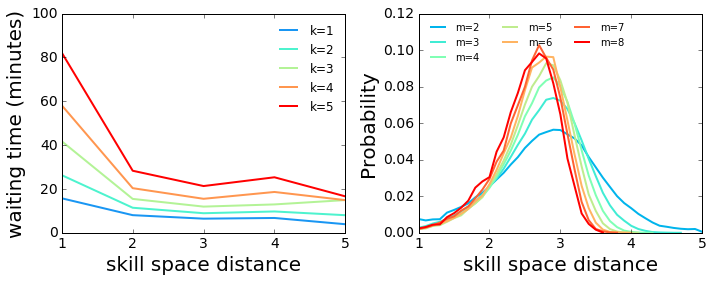

In [525]:
#cmap = cm.get_cmap('rainbow',5)
fig = plt.figure(figsize=(10, 4),facecolor='white')
#
ax = fig.add_subplot(122)
cmap = cm.get_cmap('rainbow',9)
for ts in range(2,9):
    x,y=np.array(sorted(d[ts].items())).T
    y=y/float(y.sum())
    plt.plot(x,y,color=cmap(ts),linewidth=2,label='m='+str(ts))
plt.legend(loc=2,ncol=3,fontsize=10,frameon=False)
plt.xlim(1,5)
#plt.ylim(0,60)
plt.xlabel('skill space distance',size=20)
plt.ylabel('Probability',size=20)
plt.xticks(range(1,6))
ax.tick_params(axis='both', which='major', labelsize=14)
#
ax = fig.add_subplot(121)
cmap = cm.get_cmap('rainbow',6)
for ntags in range(1,6):
    x,y=np.array(sorted([(i,np.median(c[ntags][i])) for i in c[ntags]])).T
    plt.plot(x,y,color=cmap(ntags),linewidth=2,label='k='+str(ntags))
plt.legend(frameon=False)
plt.xlim(1,5)
plt.ylim(0,100)
#plt.ylim(1,5)
plt.xticks(range(1,6))
plt.xlabel('skill space distance',size=20)
plt.ylabel('waiting time (minutes)',size=20)
ax.tick_params(axis='both', which='major', labelsize=14)
#
plt.tight_layout()
#plt.savefig('/Users/lingfeiw/Documents/research/effectiveTeam/skilldis.png')

In [418]:
c1=defaultdict(lambda:defaultdict(lambda:[]))
e1=defaultdict(lambda:[])
n=0
for questionID in Qaer:
    n+=1
    if n%100000 == 0:
        flushPrint(n/100000)
    if questionID in Qwt and questionID in Qtag:
        wt=Qwt[questionID]
        ntags=Qtag[questionID]
        ts=len(M[questionID])
        if ts==4:
            '''
            score=QS[questionID]
            if score<5:
                z='<5'
            if 5<=score<10:
                z='5-10'
            if 10<=score<15:
                z='10-15'
            if 15<=score<20:
                z='15-20'
            if 20<=score<25:
                z='20-25'
            if 25<=score:
                z='>25'
            '''
            vs=Qaer[questionID]
            AVS=[]
            for i,j in itertools.combinations(vs, 2):
                if i in UP and j in UP:
                    a=np.array(UP[i])
                    b=np.array(UP[j])
                    AVS.append(np.linalg.norm(a-b))
            if AVS:
                dis=int(np.round(np.mean(AVS),1))
                c1[ntags][dis].append(wt)
                e1[ts].append(dis)

29

In [419]:
d1=defaultdict(lambda:0)
for ts in e1:
    for di in e1[ts]:
        d1[di]+=1
xd1,yd1=np.array(d1.items()).T
yd1=yd1/float(yd1.sum())

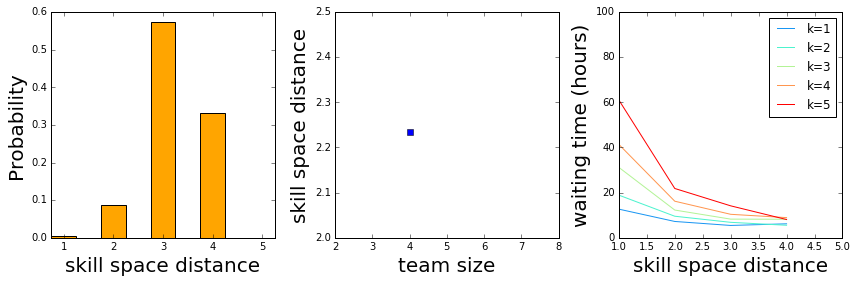

In [420]:
#cmap = cm.get_cmap('rainbow',5)
fig = plt.figure(figsize=(12, 4),facecolor='white')
#
ax = fig.add_subplot(131)
width = .5
plt.bar(xd1, yd1, width=width,color='Orange')
plt.xticks(xd1 + width / 2, range(1,6))
plt.xlabel('skill space distance',fontsize=20)
plt.ylabel('Probability',fontsize=20)
#
ax = fig.add_subplot(132)
x,y=np.array(sorted([(i,np.mean(e1[i])) for i in e1])).T
plt.plot(x,y,'bs-')
plt.xlabel('team size',size=20)
plt.ylabel('skill space distance',size=20)
plt.xlim(2,8)
plt.ylim(2,2.5)
#
ax = fig.add_subplot(133)
cmap = cm.get_cmap('rainbow',6)
for ntags in range(1,6):
    x,y=np.array(sorted([(i,np.median(c1[ntags][i])) for i in c1[ntags]])).T
    plt.plot(x,y,color=cmap(ntags),label='k='+str(ntags))
plt.legend()
plt.xlim(1,5)
plt.ylim(0,100)
#plt.ylim(1,5)
plt.xlabel('skill space distance',size=20)
plt.ylabel('waiting time (hours)',size=20)
#
plt.tight_layout()
#plt.savefig('/Users/lingfeiw/Documents/research/effectiveTeam/dis.png')

# popularity, answer rate and waiting time

In [24]:
# waiting time of tags
Wtag={}
n=0
for i in Q:
    n+=1
    if n%100000 == 0:
        flushPrint(n/100000)
    try:
        answerid=Q[i][1]
        qtime = Q[i][2]
        tags=Q[i][3]
        if answerid in A:
            atime=A[answerid][2]
            delta=dt.strptime(atime,'%Y-%m-%dT%H:%M:%S')-dt.strptime(qtime,'%Y-%m-%dT%H:%M:%S')
            wt=delta.seconds/60.0
            if wt>0:
                for tag in tags:
                    if tag not in Wtag:
                        Wtag[tag]=[wt]
                    else:
                        Wtag[tag].append(wt)
    except:
        pass

# answer rate of tags


Rtag=defaultdict(lambda:[0,0])#total N,answered N
RCtag={}#total N,answered N

n=0
filename = path + site + '/Posts.xml'
with open(filename,'r') as f:
    for line in f:
        n+=1
        if n%100000 == 0:
            flushPrint(n/100000)
        try:
            label = line.split('PostTypeId=')[1][1:2]
            postid = int(line.split('Id=')[1].split(r'"')[1])
            tags=line.split('Tags=')[1].split(r'"')[1].split(r';')
            tags=set([j for j in [i.split(r'&')[0] for i in tags if i] if j])
            rtags=tuple(tags)
            if rtags not in RCtag:
                RCtag[rtags]=[0,0]
            if label == '1':#question
                l = line.split('AcceptedAnswerId=')
                if len(l)==2:# Questions that have answers
                    RCtag[rtags][0]+=1
                    RCtag[rtags][1]+=1
                    for tag in tags:
                        Rtag[tag][0]+=1
                        Rtag[tag][1]+=1
                else:# Questions that do not have answers
                    RCtag[rtags][0]+=1
                    for tag in tags:
                        Rtag[tag][0]+=1                
        except:
            pass
# 180



180

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

V1={}
with open('/Users/lingfeiw/Documents/research/effectiveTeam/SOtags2vec.txt', "rb") as f:
    for line in f:
        line = line.strip().split('\t')
        V1[line[0]]=map(float,line[1:])

In [29]:


RCt={}
for i in RCtag:
    x,y=RCtag[i]
    if x>=10:
        RCt[i]=y/float(x)

In [30]:
len(RCt)

46444

In [157]:
Rt={}
for i in Rtag:
    if i in Wtag:
        x,y=Rtag[i]
        r=y/float(x)
        t=np.mean(Wtag[i])
        Rt[i]=[r,t]

from scipy.stats.stats import pearsonr
x,y=np.array(Rt.values()).T
pearsonr(x,y)

(-0.21813891083567188, 0.0)

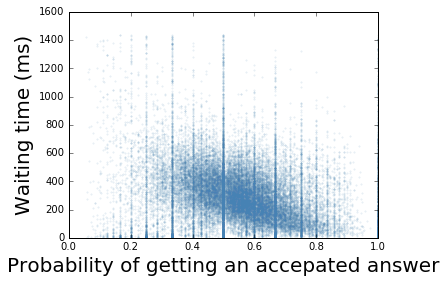

In [164]:
plt.figure(figsize=(6, 4))
plt.plot(x,y,marker='.',alpha=0.1,color='steelblue',linestyle='',markersize=3)
plt.xlabel('Probability of getting an accepated answer',size=20)
plt.ylabel('Waiting time (ms)',size=20)
plt.tight_layout()
plt.savefig('/Users/lingfeiw/Documents/research/effectiveTeam/wt.png')

In [7]:
Rt.keys()[:3]

['mdbg', 'screen-resolution', 'userscripts']

In [81]:
# waiting time of questions/tag combinations

In [166]:
#from scipy import spatial
data=[]
for i in Q:
    if i in Qwt:
        author,answerID,datetime,tags=Q[i]
        if len(tags)==2:
            a,b=list(tags)
            if a in Rt and b in Rt and tuple(tags) in RCt and a in V1 and b in V1:
                r1=Rt[a][0]
                r2=Rt[b][0]
                #wt=Qwt[i]
                dist1 = np.linalg.norm(np.array(V1[a])-np.array(V1[b]))
                #dist2=spatial.distance.cosine(V1[a], V1[b])
                rr=RCt[tuple(tags)]
                data.append([r1,r2,rr,dist1])

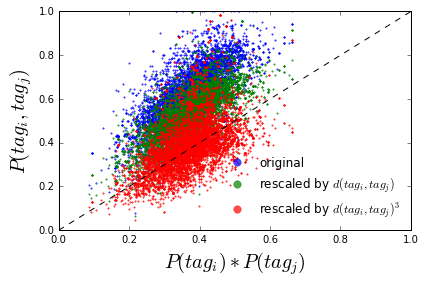

In [197]:
fig = plt.figure(figsize=(6, 4),facecolor='white')
x,y,z,k=np.array(data[:10000]).T
plt.plot(x*y,z,'b.',alpha=0.7,markersize=3,label='original')
plt.plot(x*y,z/k,'g.',alpha=0.7,markersize=3,label='rescaled by '+r'$d(tag_i,tag_j)$')
plt.plot(x*y,z/k**3,'r.',alpha=0.7,markersize=3,label='rescaled by '+r'$d(tag_i,tag_j)^3$')
plt.plot([0,1],[0,1],'k--')
plt.xlabel(r'$P(tag_i)*P(tag_j)$',size=20)
plt.ylabel(r'$P(tag_i,tag_j)$',size=20)
plt.legend(loc=4,numpoints=1,frameon=False,markerscale=5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.tight_layout()
plt.savefig('/Users/lingfeiw/Documents/research/effectiveTeam/rescale.png')

In [93]:
# user combinations
M.items()[:3]

[(8388608, defaultdict(<function __main__.<lambda>>, {812837: 1, 1075830: 1})),
 (20502637, defaultdict(<function __main__.<lambda>>, {256413: 1})),
 (4,
  defaultdict(<function __main__.<lambda>>,
              {9: 1,
               39: 1,
               55: 1,
               356: 1,
               446: 1,
               905: 1,
               12950: 1,
               16473: 1,
               29407: 1,
               59303: 1,
               1091828: 1,
               1391700: 1,
               2241405: 1}))]

In [96]:
TM=defaultdict(lambda:0)
for i in M:
    if len(M[i])==2:
        ts=tuple(sorted(M[i].keys()))
        TM[ts]+=1

In [101]:
TM1=dict((k,v) for k,v in TM.items() if v>=10)

In [102]:
len(TM),len(TM1)

(1001101, 626)

In [103]:
TM1

{(304, 157882): 24,
 (476, 285587): 10,
 (582, 77567): 10,
 (740, 27535): 12,
 (740, 73226): 14,
 (1338, 220643): 11,
 (1583, 17034): 17,
 (1583, 22656): 27,
 (1583, 23354): 11,
 (1583, 27535): 10,
 (1583, 29407): 15,
 (1583, 36305): 13,
 (1755, 303696): 11,
 (1755, 424723): 28,
 (1755, 566791): 16,
 (2548, 9787): 25,
 (2548, 10527): 10,
 (2548, 77335): 57,
 (2648, 6509): 10,
 (3501, 317266): 14,
 (3501, 765955): 10,
 (4279, 100297): 13,
 (4509, 1179573): 12,
 (4668, 226431): 10,
 (6309, 46058): 17,
 (6309, 119963): 11,
 (6309, 138479): 12,
 (6309, 223092): 12,
 (6309, 526535): 13,
 (6366, 222479): 12,
 (6509, 190201): 18,
 (7552, 301832): 19,
 (7552, 459745): 10,
 (7585, 36305): 26,
 (7585, 415448): 18,
 (8155, 22656): 19,
 (8355, 589924): 10,
 (8992, 110204): 13,
 (9034, 27535): 10,
 (9833, 153982): 13,
 (9833, 520612): 36,
 (9833, 526535): 25,
 (9833, 608772): 12,
 (9922, 349524): 10,
 (10397, 18747): 11,
 (10661, 95810): 19,
 (10673, 190807): 16,
 (10823, 36305): 38,
 (11225, 50508

In [105]:
len(Q),len(A)

(3784918, 11463988)

In [106]:
# answer rate of users
UA={}#total number, accepated number
n=0
for answerID in A:
    n+=1
    if n%100000 == 0:
        flushPrint(n/100000)
    author,questionID,datetime=A[answerID] 
    if author not in UA:
        UA[author]=[0,0]
    if questionID in Q and Q[questionID][1]==answerID:
        UA[author][0]+=1
        UA[author][1]+=1
    else:
        UA[author][0]+=1

114

In [110]:
UA1=dict((k,v[1]/float(v[0])) for k,v in UA.items())

In [111]:
UA1.items()[:3]

[(1, 0.29411764705882354), (2, 0.4), (3, 0.3611111111111111)]

In [114]:
MUA={}#total number, accepated number
for questionID in M:
    if len(M[i])==2:
        ts=tuple(sorted(M[questionID].keys())) 
        if ts in TM1:
            if ts not in MUA:
                MUA[ts]=[0,0]
            answerID=Q[questionID][1]
            if answerID in A:
                author=A[answerID][0]
                if author in ts:
                    MUA[ts][0]+=1
                    MUA[ts][1]+=1
                else:
                    MUA[ts][0]+=1

In [ ]:

#team size distribution
M=defaultdict(lambda:defaultdict(lambda:0))
n=0
for j in A:
    n+=1
    if n%100000 == 0:
        flushPrint(n/100000)
    try:
        wr,qid,wt = A[j]
        if qid in Q:
            M[qid][wr]+=1
    except:
        pass


In [143]:
data=[]
for i,j in TM1.keys():
    if i in UP and j in UP:
        a=np.array(UP[i])
        b=np.array(UP[j])
        dis=np.linalg.norm(a-b)
        data.append([dis,TM1[(i,j)]])

In [145]:
x,y=np.array(data).T

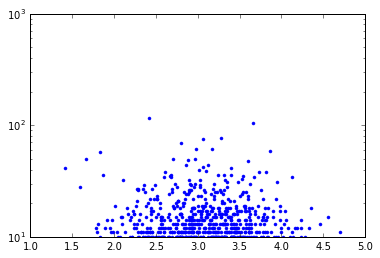

In [147]:
plt.plot(x,y,'b.')
plt.yscale('log')